In [1]:
import json
import tweepy
import numpy as np
import pandas as pd
import config
import time

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import matplotlib.pyplot as plt
import seaborn as sns

auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_token_secret)
api = tweepy.API(auth)

def analyze_tweet(tweet):
    tweet = tweet._json
    score = analyzer.polarity_scores(tweet["text"])
    return score

In [2]:
def analyse_tweeter(user_handle):
    largest_id = 0
    counter = 1
    while counter < 100 :
        for page in tweepy.Cursor(api.search, q=target_term, max_id=largest_id, count = 25).pages(4):
            if not largest_id:
                largest_id = page[0].id
            if counter < 100 :
                for tweet in page:
                    score = analyze_tweet(tweet)
                    tweets_ago = counter
                    sentiments.append({ "Source": user_handle,"Tweet Text": tweet.text,"Tweet Date" : tweet.created_at,
                                       "Compound": score["compound"],"Positive": score["pos"],"Neutral": score["neg"],
                                        "Negative": score["neg"],"Tweets Ago": counter})
                    counter = counter + 1
    return sentiments

In [3]:
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")
sentiments = []
for target_term in target_users:
    sentiments = analyse_tweeter(target_term)
sentiments_pd = pd.DataFrame.from_dict(sentiments)

In [4]:
sentiments_pd.head()

,Compound,Negative,Neutral,Positive,Source,Tweet Date,Tweet Text,Tweets Ago
0,0.7065,0.0,0.0,0.175,@BBC,2018-10-08 04:49:17,RT @BBC: 🎤🎶 The music. The performances. The I...,1
1,0.7065,0.0,0.0,0.175,@BBC,2018-10-08 04:48:35,RT @BBC: 🎤🎶 The music. The performances. The I...,2
2,0.7065,0.0,0.0,0.175,@BBC,2018-10-08 04:48:32,RT @BBC: 🎤🎶 The music. The performances. The I...,3
3,0.7065,0.0,0.0,0.175,@BBC,2018-10-08 04:48:31,RT @BBC: 🎤🎶 The music. The performances. The I...,4
4,0.7065,0.0,0.0,0.175,@BBC,2018-10-08 04:48:28,RT @BBC: 🎤🎶 The music. The performances. The I...,5


In [5]:
sentiments_pd.to_csv("NewsMood.csv", encoding="UTF-8")
sentiments_pd.to_excel("NewsMood.xlsx", encoding="UTF-8")

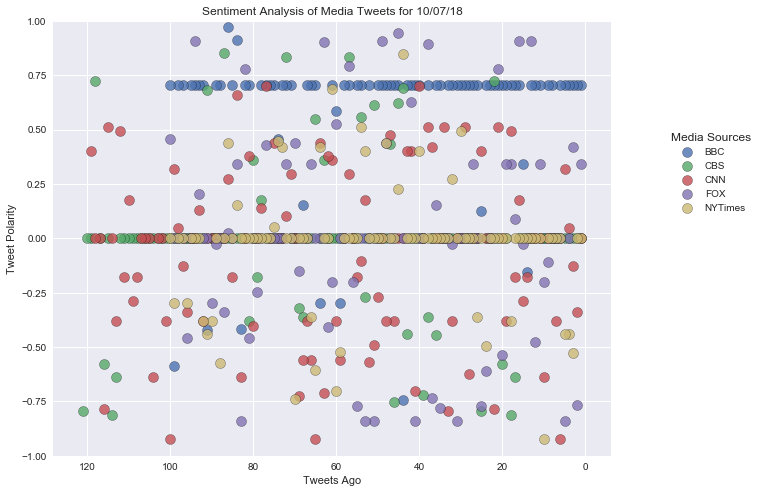

In [6]:
plt.figure(figsize=(10,8))
sns.set()
plt.gca().invert_xaxis()
handle1 = plt.scatter(sentiments_pd[sentiments_pd["Source"]=="@BBC"]["Tweets Ago"], 
                      sentiments_pd[sentiments_pd["Source"]=="@BBC"]["Compound"], 
                      s = 100,alpha = 0.8, marker="o",edgecolors="black",label = "BBC")
handle2 = plt.scatter(sentiments_pd[sentiments_pd["Source"]=="@CBS"]["Tweets Ago"], 
                      sentiments_pd[sentiments_pd["Source"]=="@CBS"]["Compound"], 
                      s = 100,alpha = 0.8, marker="o",edgecolors="black",label = "CBS")
handle3 = plt.scatter(sentiments_pd[sentiments_pd["Source"]=="@CNN"]["Tweets Ago"], 
                      sentiments_pd[sentiments_pd["Source"]=="@CNN"]["Compound"], 
                      s = 100,alpha = 0.8, marker="o",edgecolors="black",label = "CNN")
handle4 = plt.scatter(sentiments_pd[sentiments_pd["Source"]=="@FoxNews"]["Tweets Ago"], 
                      sentiments_pd[sentiments_pd["Source"]=="@FoxNews"]["Compound"], 
                      s = 100,alpha = 0.8, marker="o",edgecolors="black",label = "FOX")
handle5 = plt.scatter(sentiments_pd[sentiments_pd["Source"]=="@nytimes"]["Tweets Ago"], 
                      sentiments_pd[sentiments_pd["Source"]=="@nytimes"]["Compound"], 
                      s = 100,alpha = 0.8, marker="o",edgecolors="black",label = "NYTimes")
lgnd = plt.legend(handles= [handle1, handle2, handle3, handle4, handle5], loc=(1.1, 0.55), title= 'Media Sources')
plt.title("Sentiment Analysis of Media Tweets for %s" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.ylim(-1, 1)
plt.show()

In [7]:
aggr_comp_sentiments = sentiments_pd.groupby("Source")["Compound"].mean()
aggr_comp_sentiments

Source
@BBC        0.493780
@CBS       -0.007002
@CNN       -0.059708
@FoxNews    0.016108
@nytimes   -0.026468
Name: Compound, dtype: float64

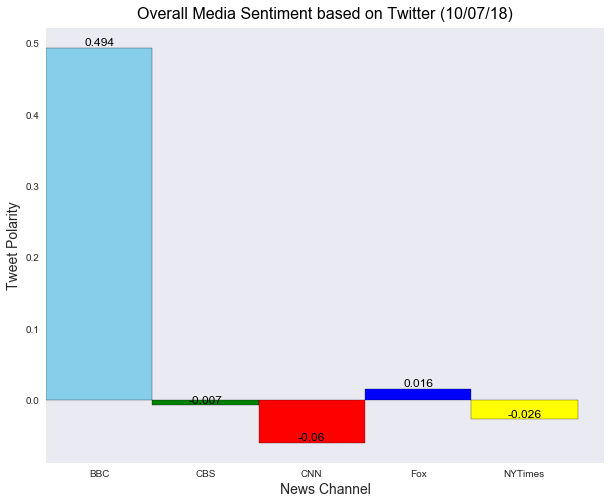

In [8]:
sns.set_style("dark")
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'fontname':'Arial', 'size':'14'}

fig, ax = plt.subplots(figsize=(10,8))
ticks_loc = np.arange(len(aggr_comp_sentiments))
width = 1
rectsBBC = ax.bar(ticks_loc[0], aggr_comp_sentiments[0], width, color='skyblue', edgecolor = 'black')
rectsCBS = ax.bar(ticks_loc[1], aggr_comp_sentiments[1], width, color='green', edgecolor = 'black')
rectsCNN = ax.bar(ticks_loc[2], aggr_comp_sentiments[2], width, color='red', edgecolor = 'black')
rectsFOX = ax.bar(ticks_loc[3], aggr_comp_sentiments[3], width, color='blue', edgecolor = 'black')
rectsNYT = ax.bar(ticks_loc[4], aggr_comp_sentiments[4], width, color='yellow', edgecolor = 'black')

ax.set_title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%x")), **title_font)
ax.set_xlabel("News Channel", **axis_font)
ax.set_ylabel("Tweet Polarity", **axis_font)
ax.set_xticks(ticks_loc)
ax.set_xticklabels(('BBC', 'CBS', 'CNN', 'Fox', 'NYTimes'))
ax.set_xlim(-0.5)

def autolabel(rects, value):
    for rect in rects:
        height = float(rect.get_height())
        ax.text(rect.get_x() + rect.get_width()/2, height,
                value,
                ha='center', va='bottom', color="black")
autolabel(rectsBBC,round(aggr_comp_sentiments[0],3) )
autolabel(rectsCBS,round(aggr_comp_sentiments[1],3))
autolabel(rectsCNN, round(aggr_comp_sentiments[2],3))
autolabel(rectsFOX,round(aggr_comp_sentiments[3],3))
autolabel(rectsNYT,round(aggr_comp_sentiments[4],3))
plt.show()